<a href="https://colab.research.google.com/github/parthSoni4/ComputerVision/blob/main/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical


# cifar10 Dataset
# cifar stands for canadian institute for advanced research ( cifar )
# it consists 60,000 images
# images are in format 32x32 format
# there are 10 classes ( each class 6,000 images )
# 50,000 training and 10,000 testing


(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
# converting images into the range [0,1]
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
# performing one hot encoding to the data
#  For example, if the original label is 3, it will be converted to [0, 0, 0, 1, 0, 0, 0, 0, 0, 0] when one-hot encoded.
# This representation is suitable for training neural networks for classification tasks.



model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
# 32 respresent the number of kernels
# (3,3) repersent the size of each kernel 3x3
# we are inputing a image of 32x32 of rgc model
# the value of kernel are choosen randomly and they are optimized during learning and optimization


model.add(layers.MaxPooling2D((2, 2)))
# pooling is a down sampling operation
# (2,2) is the size of pooling window

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)


Epoch 1/10
313/313 [==============================] - 4s 8ms/step - loss: 1.6551 - accuracy: 0.3941 - val_loss: 1.4347 - val_accuracy: 0.4899
Epoch 2/10
313/313 [==============================] - 2s 7ms/step - loss: 1.2746 - accuracy: 0.5462 - val_loss: 1.2409 - val_accuracy: 0.5563
Epoch 3/10
313/313 [==============================] - 2s 7ms/step - loss: 1.1150 - accuracy: 0.6039 - val_loss: 1.1101 - val_accuracy: 0.6066
Epoch 4/10
313/313 [==============================] - 3s 9ms/step - loss: 0.9916 - accuracy: 0.6514 - val_loss: 1.0215 - val_accuracy: 0.6372
Epoch 5/10
313/313 [==============================] - 3s 8ms/step - loss: 0.9040 - accuracy: 0.6842 - val_loss: 0.9502 - val_accuracy: 0.6668
Epoch 6/10
313/313 [==============================] - 3s 9ms/step - loss: 0.8327 - accuracy: 0.7082 - val_loss: 0.8975 - val_accuracy: 0.6879
Epoch 7/10
313/313 [==============================] - 3s 9ms/step - loss: 0.7738 - accuracy: 0.7313 - val_loss: 0.9087 - val_accuracy: 0.6835
Epoch 

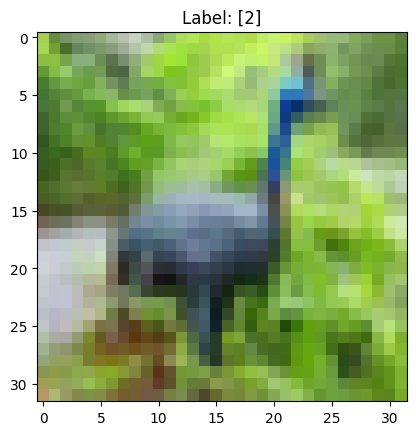

In [ ]:

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Access a specific image and its label from the training data
index = 6  # Change this to access different images
image = x_train[index]
label = y_train[index]

# Display the image
plt.imshow(image)
plt.title(f"Label: {label}")
plt.show()


1/1 [==============================] - 0s 42ms/step
Predicted class label: horse


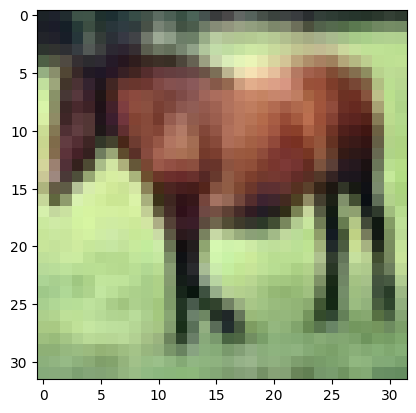

In [ ]:
index = 7  # Change this to access different images
image = x_train[index]
plt.imshow(image)
image = image.astype('float32') / 255
image = tf.expand_dims(image, axis=0)
predictions = model.predict(image)
predicted_class_index = tf.argmax(predictions, axis=1)[0].numpy()

# Get the class labels from CIFAR-10 dataset
class_labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Get the predicted class label
predicted_class_label = class_labels[predicted_class_index]

# Print the predicted class label
print("Predicted class label:", predicted_class_label)